# Redes Neurais Convolucionais


Nesta competição, você escreverá um algoritmo para classificar se as imagens contêm um cachorro ou um gato. Isso é fácil para humanos, cães e gatos. Seu computador terá um pouco mais de dificuldade. 

<img src='woof_meow.jpg' />


### Problema: Dada uma imagem, é um cachorro ou um gato?

Para essa tarefa, usaremos uma arquitetura de Rede Neural Convolucional. Essa arquitetura usa métodos de convolução para poder prever características específicas de uma imagem de acordo com o que aprende em um conjunto de treinamento. Por exemplo, podemos dizer que é possível perceber a diferença ao procurar bigodes em um gato ou focinho comprido em um cachorro. Mas uma Rede Neural Convolucional procura muitos outros recursos baseados no que temos em um conjunto de treinamento.

##### Conjunto de dados de treino:  2.000 imagens de cães e 2.000 imagens de gatos.

##### Conjunto de dados de validação: 500 imagens de cães e 500 imagens de gatos.

Conjunto de dados de teste: Teremos x imagens de cães e gatos.

Essa á uma questão onde os iniciantes tem muitas dúvidas. Por que precisamos de dados de treino, validação e teste? Usamos os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usamos os dados de validação, para avaliar o modelo durante o treinamento. Usamos os dados de teste para validar a performance do modelo já treinado, ou seja, apresentamos ao modelo dados que ele não viu durante o treinamento, a fim de garantir que ele é capaz de fazer previsões.

**obs:** É necessário adicionar a pasta `dataset` econtrada [aqui](https://github.com/adrianosanick/InteligenciaArtificial/tree/master/4-CNN/Solucoes/dataset), na raiz deste arquivo.

# **Vamos começar!**



## Importando as bibliotecas

In [47]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image

### Arquitetura da Rede Convolucional


<img src='arquitetura.png'/>

In [48]:
classificador = Sequential()
classificador.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
                padding='same', input_shape=(224, 224, 3)))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D((2, 2)))
classificador.add(Dropout(0.2))  

classificador.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D((2, 2)))
classificador.add(Dropout(0.25))

classificador.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D((2, 2)))
classificador.add(Dropout(0.3))

classificador.add(Flatten())
classificador.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
classificador.add(BatchNormalization())
classificador.add(Dropout(0.35))
classificador.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
classificador.add(BatchNormalization())
classificador.add(Dropout(0.4))
classificador.add(Dense(2, activation='relu', kernel_initializer='he_uniform'))
classificador.add(BatchNormalization())
classificador.add(Dropout(0.5))
classificador.add(Dense(1, activation='sigmoid'))

classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                      metrics = ['accuracy'])

2022-08-08 16:18:37.757033: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.
2022-08-08 16:18:38.105066: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 411041792 exceeds 10% of free system memory.


### Vamos gerar algumas imagens 

<img src= 'ImageGenerator.png' widht=300/>


### Normalizar as imagens

In [49]:
gerador_treinamento = ImageDataGenerator(rescale = 1./255,
                                         rotation_range = 7,
                                         horizontal_flip = True,
                                         shear_range = 0.2,
                                         height_shift_range = 0.07,
                                         zoom_range = 0.2)
gerador_teste = ImageDataGenerator(rescale = 1./255)

In [50]:
base_treinamento = gerador_treinamento.flow_from_directory('dataset/training_set',
                                                           target_size = (224, 224),
                                                           batch_size = 64,
                                                           class_mode = 'binary')

Found 4000 images belonging to 2 classes.


In [51]:
base_teste = gerador_teste.flow_from_directory('dataset/test_set',
                                               target_size = (224, 224),
                                               batch_size = 64,
                                               class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [52]:
classificador.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 224, 224, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 112, 112, 64)    

## Treinamento

In [53]:
classificador.fit_generator(base_treinamento, steps_per_epoch = 40,
                            epochs = 10, validation_data = base_teste,
                            validation_steps = 10)

/tmp/ipykernel_67091/432125781.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classificador.fit_generator(base_treinamento, steps_per_epoch = 40,


Epoch 1/10
40/40 [==============================] - 295s 7s/step - loss: 0.7617 - accuracy: 0.5431 - val_loss: 3.9907 - val_accuracy: 0.5063
Epoch 2/10
40/40 [==============================] - 271s 7s/step - loss: 0.6971 - accuracy: 0.5712 - val_loss: 18.1426 - val_accuracy: 0.5000
Epoch 3/10
40/40 [==============================] - 293s 7s/step - loss: 0.6984 - accuracy: 0.5661 - val_loss: 6.3627 - val_accuracy: 0.5016
Epoch 4/10
40/40 [==============================] - 249s 6s/step - loss: 0.6898 - accuracy: 0.5724 - val_loss: 8.3384 - val_accuracy: 0.4953
Epoch 5/10
40/40 [==============================] - 276s 7s/step - loss: 0.6706 - accuracy: 0.5961 - val_loss: 6.4479 - val_accuracy: 0.4906
Epoch 6/10
40/40 [==============================] - 303s 8s/step - loss: 0.6723 - accuracy: 0.5981 - val_loss: 7.3312 - val_accuracy: 0.4891
Epoch 7/10
40/40 [==============================] - 284s 7s/step - loss: 0.6493 - accuracy: 0.6167 - val_loss: 3.1875 - val_accuracy: 0.5234
Epoch 8/10
4

## Teste *

In [58]:
from tensorflow.keras.preprocessing import image

imagem_teste = image.load_img('dataset/test_set/cachorro/dog.3970.jpg',
                              target_size = (224,224))

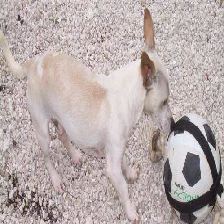

In [59]:
imagem_teste

In [60]:
imagem_teste = image.img_to_array(imagem_teste)
imagem_teste /= 255

In [61]:
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

In [62]:
previsao = classificador.predict(imagem_teste)
previsao

1/1 [==============================] - 2s 2s/step


array([[0.9990234]], dtype=float32)

In [63]:
base_treinamento.class_indices

{'cachorro': 0, 'gato': 1}

In [64]:
previsao = (previsao > 0.5)
previsao

array([[ True]])

In [65]:
previsao

array([[ True]])

---

### Criando método de testes

In [71]:
testDogs = ["cachorro/dog."+str(i)+".jpg" for i in range(3500,4000)]
testCats = ["gato/cat."+str(i)+".jpg" for i in range(3500,4000)]

In [72]:
def testModel(fname:str):
    imagem_teste = image.load_img('dataset/test_set/'+fname, target_size = (224,224))
    imagem_teste = image.img_to_array(imagem_teste)
    imagem_teste /= 255
    imagem_teste = np.expand_dims(imagem_teste, axis = 0)
    previsao = classificador.predict(imagem_teste)
    return (0 if previsao[0] <= 0.5 else 1)

In [73]:
import random

testList = []
y = []
countDog = 0
countCat = 0
for i in range(len(testDogs)+len(testCats)):
    rand = random.random()
    if rand <= 0.5:
        if countDog < len(testDogs):
            testList.append(testDogs[countDog])
            countDog+=1
            y.append(0)
    else:
        if countCat < len(testCats):
            testList.append(testCats[countCat])
            countCat+=1
            y.append(1)

### Aplicando Teste:

In [74]:
from sklearn.metrics import classification_report

y_hat = list(map(testModel, testList))
report = classification_report(y, y_hat)

1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 52ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 50ms/step
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

              precision    recall  f1-score   support

           0       0.84      0.07      0.13       492
           1       0.52      0.99      0.68       500

    accuracy                           0.53       992
   macro avg       0.68      0.53      0.41       992
weighted avg       0.68      0.53      0.41       992



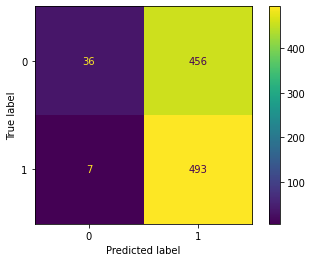

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(report) 

cm = confusion_matrix(y, y_hat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [80]:
print(y)
print(y_hat)

[1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 

Observando na Matriz de Confusão, é possível ver que o modelo teve bons resultados para os *True Positives*, porém, isso acontece pois a grande maioria das predições resulta em 1, como pode-se observar nos *False Positives*. É possível que isso ocorra pois o número de épocas não foi muito grande e o treinamento não foi suficiente para conseguir melhores resultados.